![title.png](ML_03.pptx.png)

![title](ML_03.pptx_2.png)

## 1. Logarithms
**Theory**

Logarithms are the inverse of exponentiation. They simplify products into sums and compress wide-ranging values.

### How Logarithms Are Used in Machine Learning

Logarithms are fundamental in machine learning for several reasons:

1. **Log Loss (Cross-Entropy Loss):**  
   Logarithms are used in classification loss functions like **log loss**, which penalizes incorrect predictions more heavily when they are made with high confidence. It is defined as:
   $$
   \text{Log Loss} = -\left[y \log(p) + (1 - y) \log(1 - p)\right]
   $$
   This use of logs helps ensure the model produces well-calibrated probabilities.

2. **Likelihood and Maximum Likelihood Estimation (MLE):**  
   In statistical modeling, parameters are often estimated by maximizing the **likelihood** of the data. Since this involves multiplying many small probabilities, we instead take the **log-likelihood**:
   $$
   \log L(\theta) = \sum_{i=1}^n \log P(x_i \mid \theta)
   $$
   This transforms products into sums and makes optimization more numerically stable and computationally efficient.

3. **Feature Scaling and Transformation:**  
   Logarithms are used to transform skewed features, such as income or population size. This **log transformation** helps reduce skew, stabilize variance, and make data more normally distributed or linearly separable, which can improve the performance of models like linear regression or SVMs.


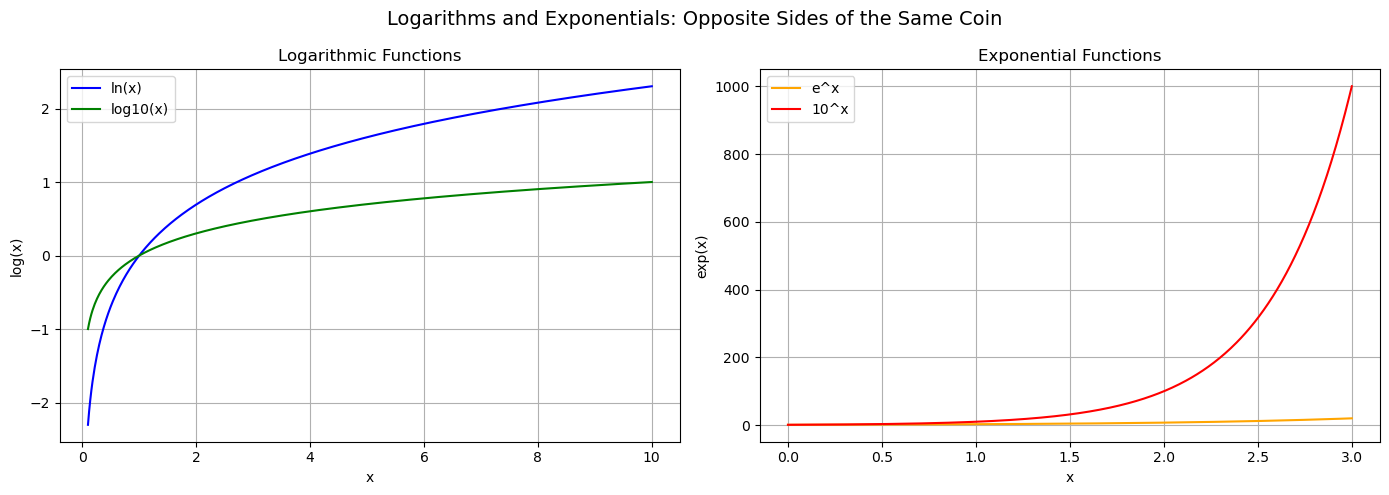

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Data for logarithmic functions
x = np.linspace(0.1, 10, 500)
log_e = np.log(x)
log_10 = np.log10(x)

# Data for exponential functions
x_exp = np.linspace(0, 3, 500)
exp_e = np.exp(x_exp)
exp_10 = 10**x_exp

# Create side-by-side subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Left plot: Logarithmic functions
axs[0].plot(x, log_e, label='ln(x)', color='blue')
axs[0].plot(x, log_10, label='log10(x)', color='green')
axs[0].set_title('Logarithmic Functions')
axs[0].set_xlabel('x')
axs[0].set_ylabel('log(x)')
axs[0].grid(True)
axs[0].legend()

# Right plot: Exponential functions
axs[1].plot(x_exp, exp_e, label='e^x', color='orange')
axs[1].plot(x_exp, exp_10, label='10^x', color='red')
axs[1].set_title('Exponential Functions')
axs[1].set_xlabel('x')
axs[1].set_ylabel('exp(x)')
axs[1].grid(True)
axs[1].legend()

# Add overall title
plt.suptitle('Logarithms and Exponentials: Opposite Sides of the Same Coin', fontsize=14)
plt.tight_layout()
plt.show()


**Real-World Example**

In classification tasks, logarithms are used in the log loss function to penalize incorrect predictions based on their probability.

## 2. Probability and Likelihood
**Probability**

Probability measures how likely an event is to happen. It is a number between 0 and 1, where 0 means the event will never occur and 1 means the event will always occur. For example, the probability of flipping a fair coin and getting heads is 0.5, because there are two equally likely outcomes.
.

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


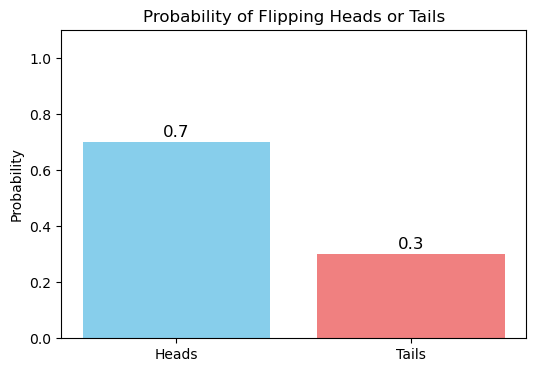

In [27]:
import matplotlib.pyplot as plt

# Outcomes and their probabilities
outcomes = ['Heads', 'Tails']
probabilities = [0.7, 0.3]

fig, ax = plt.subplots(figsize=(6, 4))
bars = ax.bar(outcomes, probabilities, color=['skyblue', 'lightcoral'])

# Label bars with probabilities
for bar, prob in zip(bars, probabilities):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.02, f'{prob}', ha='center', fontsize=12)

ax.set_ylim(0, 1.1)
ax.set_ylabel('Probability')
ax.set_title('Probability of Flipping Heads or Tails')
plt.show()


**Likelihood**

Likelihood is a function of the model parameters given observed data. It measures how plausible a set of parameters is for the observed data. For example, if you observed 7 heads out of 10 coin flips, the likelihood tells you how likely different values of the coin’s fairness (parameter) are given this data.


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
import ipywidgets as widgets
from IPython.display import display

p_values = np.linspace(0, 1, 100)

def plot_likelihood(n, k):
    if k > n:
        return  # invalid input, do nothing
    likelihoods = binom.pmf(k, n, p_values)
    plt.figure(figsize=(8, 5))
    plt.plot(p_values, likelihoods, label=f'Likelihood of p given {k} heads in {n} flips')
    plt.xlabel('Probability of Heads (p)')
    plt.ylabel('Likelihood')
    plt.title('Likelihood Function for Coin Fairness')
    plt.grid(True)
    plt.legend()
    plt.ylim(0, max(likelihoods)*1.1 if max(likelihoods) > 0 else 1)
    plt.show()

n_slider = widgets.IntSlider(value=10, min=1, max=50, step=1, description='Total flips (n):')
k_slider = widgets.IntSlider(value=7, min=0, max=n_slider.value, step=1, description='Heads (k):')

def update_k_slider(*args):
    k_slider.max = n_slider.value
    if k_slider.value > n_slider.value:
        k_slider.value = n_slider.value

n_slider.observe(update_k_slider, 'value')

widgets.interact(plot_likelihood, n=n_slider, k=k_slider)

interactive(children=(IntSlider(value=10, description='Total flips (n):', max=50, min=1), IntSlider(value=7, d…

<function __main__.plot_likelihood(n, k)>

Question time!

## 3. Maximum Likelihood
**Theory**

Maximum Likelihood Estimation (MLE) finds the parameter values that maximize the likelihood of observing the given data.

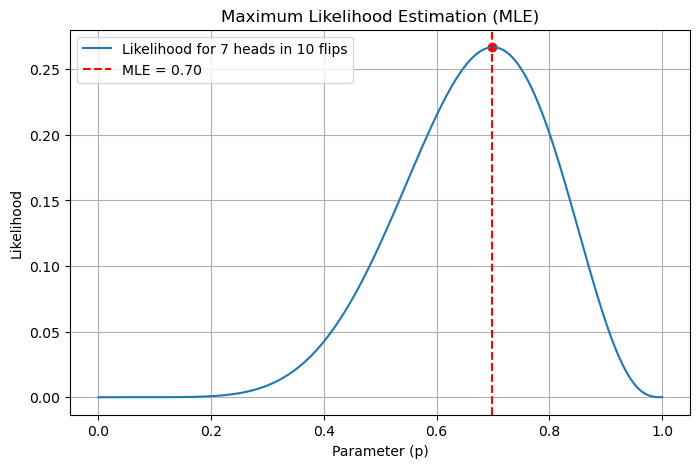

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Observed data
n = 10
k = 7

# Parameter values (p) to evaluate
p_values = np.linspace(0, 1, 200)
likelihood = binom.pmf(k, n, p_values)

# MLE: the value of p that maximizes the likelihood
mle_p = p_values[np.argmax(likelihood)]

# Plot
plt.figure(figsize=(8, 5))
plt.plot(p_values, likelihood, label=f'Likelihood for {k} heads in {n} flips')
plt.axvline(mle_p, color='red', linestyle='--', label=f'MLE = {mle_p:.2f}')
plt.scatter([mle_p], [max(likelihood)], color='red')
plt.title('Maximum Likelihood Estimation (MLE)')
plt.xlabel('Parameter (p)')
plt.ylabel('Likelihood')
plt.grid(True)
plt.legend()
plt.show()


**Real-World Example**

MLE principle is foundational in fitting statistical models, including logistic regression and Naive Bayes. MLE is used in logistic regression to determine weights that maximize the probability of correctly classifying training data.

## 4. MLE for Exponential Distribution
**Theory**

The exponential distribution models time until an event. MLE estimates the rate parameter $\lambda$  as the reciprocal of the sample mean.

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Interactive plot function
def plot_exponential_likelihood(sample_size):
    np.random.seed(42)
    x = np.random.exponential(scale=2.0, size=sample_size)  # true lambda = 0.5
    n = sample_size
    sum_x = np.sum(x)
    print(sum_x)
    lambda_vals = np.linspace(0.1, 1.5, 300)
    likelihoods = lambda_vals**n * np.exp(-lambda_vals * sum_x)
    lambda_mle = n / sum_x ## 1/sample mean to estimate lambda, as mean = 1/lambda in exponential distribution

    plt.figure(figsize=(8, 5))
    plt.plot(lambda_vals, likelihoods, label='Likelihood')
    plt.axvline(lambda_mle, color='red', linestyle='--', label=f'MLE = {lambda_mle:.2f}')
    plt.scatter([lambda_mle], [max(likelihoods)], color='red')
    plt.xlabel('Lambda (λ)')
    plt.ylabel('Likelihood')
    plt.title(f'MLE for Exponential Distribution (n = {sample_size})')
    plt.grid(True)
    plt.legend()
    plt.show()

# Create slider
size_slider = widgets.IntSlider(value=50, min=5, max=200, step=5, description='Sample Size:')
widgets.interact(plot_exponential_likelihood, sample_size=size_slider)


interactive(children=(IntSlider(value=50, description='Sample Size:', max=200, min=5, step=5), Output()), _dom…

<function __main__.plot_exponential_likelihood(sample_size)>

**Real-World Example**

Used in survival analysis to model time to failure or dropout events.

## 5. Odds and Log-Odds
**Theory**

Odds represent the ratio of success to failure probabilities. Log-odds (or logits) transform probabilities into the real number line, enabling linear modeling in logistic regression.

## Understanding Probability, Odds, and Log-Odds

- **Probability** is the chance of success:

  $$
  P = \frac{\text{successes}}{\text{total trials}}
  $$

- **Odds** compare the number of successes to failures:

  $$
  \text{Odds} = \frac{P}{1 - P} = \frac{\text{successes}}{\text{failures}}
  $$

  For example:
  - A probability of 0.75 corresponds to odds of $( \frac{0.75}{0.25} = 3 $), or "3 to 1"
  - A probability of 0.25 corresponds to odds of $( \frac{0.25}{0.75} = \frac{1}{3} $), or "1 to 3"

- **Log-Odds** (also called the **logit**) is the logarithm of the odds:

  $$
  \text{Log-Odds} = \log\left(\frac{P}{1 - P}\right)
  $$

Log-odds transform the $[0, 1]$ probability range into the full real number line $(-\infty, +\infty)$. This is useful in models like logistic regression, where we want to model a probability using a linear function.


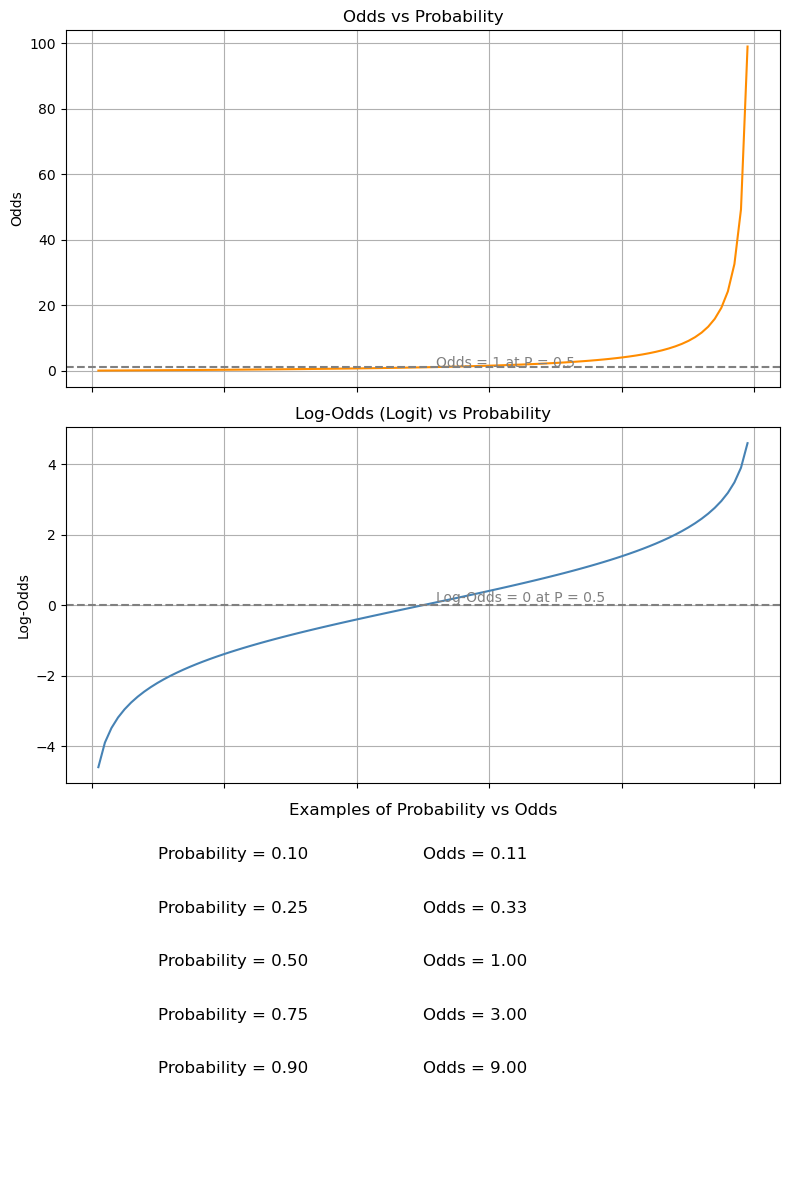

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Probabilities
p = np.linspace(0.01, 0.99, 100)
odds = p / (1 - p)
log_odds = np.log(odds)

fig, axs = plt.subplots(3, 1, figsize=(8, 12), sharex=True)

# 1. Probability vs Odds
axs[0].plot(p, odds, color='darkorange')
axs[0].set_ylabel("Odds")
axs[0].set_title("Odds vs Probability")
axs[0].grid(True)
axs[0].axhline(1, color='gray', linestyle='--')
axs[0].text(0.52, 1.05, "Odds = 1 at P = 0.5", color='gray')

# 2. Probability vs Log-Odds
axs[1].plot(p, log_odds, color='steelblue')
axs[1].set_ylabel("Log-Odds")
axs[1].set_title("Log-Odds (Logit) vs Probability")
axs[1].grid(True)
axs[1].axhline(0, color='gray', linestyle='--')
axs[1].text(0.52, 0.1, "Log-Odds = 0 at P = 0.5", color='gray')

# 3. Annotated table-style plot (manual odds examples)
example_probs = [0.1, 0.25, 0.5, 0.75, 0.9]
example_odds = [round(p/(1-p), 2) for p in example_probs]

axs[2].axis('off')
axs[2].set_title("Examples of Probability vs Odds")
for i, (prob, odd) in enumerate(zip(example_probs, example_odds)):
    axs[2].text(0.1, 0.9 - i*0.15, f"Probability = {prob:.2f}", fontsize=12)
    axs[2].text(0.5, 0.9 - i*0.15, f"Odds = {odd:.2f}", fontsize=12)

plt.xlabel("Probability")
plt.tight_layout()
plt.show()


**Real-World Example**

In logistic regression, we model the log-odds of an event occurring as a linear function of input variables.

Question time!

## 6. Odds Ratios and Log(Odds)
**Theory**

Odds ratios compare the odds of an event between two groups. Log-transforming the odds ratio simplifies interpretation and statistical modeling.

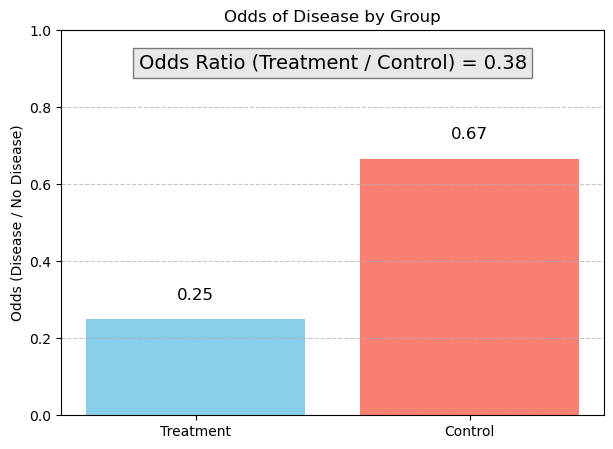

In [32]:
import matplotlib.pyplot as plt

# Data
groups = ['Treatment', 'Control']
disease = [20, 40]
no_disease = [80, 60]

# Calculate odds
odds_treatment = disease[0] / no_disease[0]
odds_control = disease[1] / no_disease[1]
odds_ratio = odds_treatment / odds_control

# Bar plot of odds
plt.figure(figsize=(7,5))
bars = plt.bar(groups, [odds_treatment, odds_control], color=['skyblue', 'salmon'])
plt.title('Odds of Disease by Group')
plt.ylabel('Odds (Disease / No Disease)')
plt.ylim(0, 1)

# Annotate bars
for bar, odds in zip(bars, [odds_treatment, odds_control]):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05,
             f'{odds:.2f}', ha='center', fontsize=12)

# Show odds ratio as text
plt.text(0.5, 0.9, f'Odds Ratio (Treatment / Control) = {odds_ratio:.2f}',
         ha='center', fontsize=14, bbox=dict(facecolor='lightgray', alpha=0.5))

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Visualization: Odds and Odds Ratio in a Medical Study

The bar plot shows the **odds of getting the disease** for two groups:

- The **Treatment group** has an odds of approximately **0.25**, meaning there are 1 patients with disease for every 4 patient without disease.
- The **Control group** has an odds of approximately **0.67**, meaning 2 patients with disease for every 3 patients without disease.

The **odds ratio (OR)** compares these two odds:

$[
\text{OR} = \frac{0.25}{0.67} \approx 0.38
]$

An OR of 0.37 means the treatment group has **63% lower odds** of developing the disease compared to the control group, indicating a protective effect of the treatment.

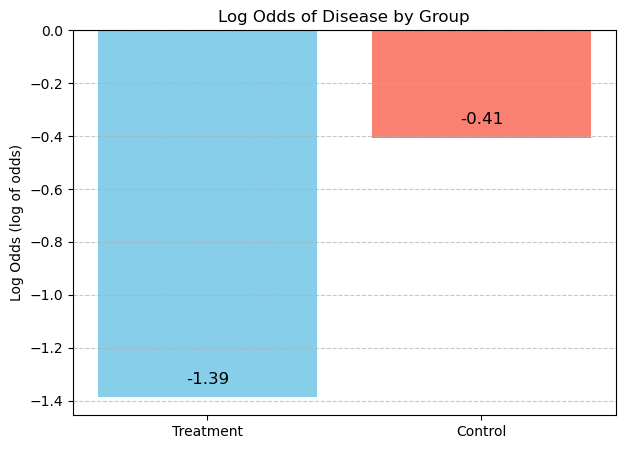

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Data from example
groups = ['Treatment', 'Control']
disease = np.array([20, 40])
no_disease = np.array([80, 60])

# Calculate odds and log odds
odds = disease / no_disease
log_odds = np.log(odds)

# Bar plot for log odds
plt.figure(figsize=(7,5))
bars = plt.bar(groups, log_odds, color=['skyblue', 'salmon'])
plt.title('Log Odds of Disease by Group')
plt.ylabel('Log Odds (log of odds)')
plt.axhline(0, color='gray', linestyle='--')

# Annotate bars with values
for bar, val in zip(bars, log_odds):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05,
             f'{val:.2f}', ha='center', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Log Odds and Their Significance

The bar plot shows the **log odds** of disease in the Treatment and Control groups.

- **Log odds** is the natural logarithm of the odds, transforming odds (which range from 0 to ∞) into the entire real number line (−∞ to +∞).
- For the Treatment group, log odds ≈ $-1.39$, and for the Control group, log odds ≈ $-0.41$.
- A log odds of 0 corresponds to odds = 1 (equal chance of disease and no disease).

### Why log odds matter:

- Log odds are **symmetric** around zero and can be positive or negative.
- This symmetry makes log odds easier to use in statistical models such as logistic regression.
- The **difference in log odds** between groups equals the **log odds ratio**:

$
\log(\text{OR}) = \log(\text{Odds}_{\text{Treatment}}) - \log(\text{Odds}_{\text{Control}}) \approx -1.39 - (-0.41) = -0.98
$

- The negative log odds ratio here indicates lower odds of disease in the Treatment group compared to Control.
- Modeling in log odds space allows linear modeling of effects that correspond to multiplicative changes in odds.

In [23]:
import numpy as np
from scipy.stats import norm

# Counts
a, b, c, d = 20, 80, 40, 60  # a=Treatment disease, b=Treatment no disease, c=Control disease, d=Control no disease

# Log odds ratio
log_or = np.log((a * d) / (b * c))

# Standard error
se_log_or = np.sqrt(1/a + 1/b + 1/c + 1/d)

# Wald z-score
z = log_or / se_log_or

# Two-sided p-value
p_value = 2 * (1 - norm.cdf(abs(z)))

# 95% confidence interval for log OR
ci_lower = log_or - 1.96 * se_log_or
ci_upper = log_or + 1.96 * se_log_or

# Exponentiate CI to get CI for OR
or_lower = np.exp(ci_lower)
or_upper = np.exp(ci_upper)

print(f"Log OR: {log_or:.3f}")
print(f"Standard Error: {se_log_or:.3f}")
print(f"Wald z-statistic: {z:.3f}")
print(f"P-value: {p_value:.4f}")
print(f"95% CI for OR: ({or_lower:.3f}, {or_upper:.3f})")


Log OR: -0.981
Standard Error: 0.323
Wald z-statistic: -3.039
P-value: 0.0024
95% CI for OR: (0.199, 0.706)


Interpretation
A small p-value (e.g., < 0.05) indicates that the odds ratio is significantly different from 1, i.e., there is a statistically significant association between treatment and disease.

The 95% confidence interval for the OR tells us the plausible range of values for the true OR.

Since the interval does not include 1 here, the effect is statistically significant.

![title](ML_03.pptx_3.png)